<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/exa2.24_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

###  Librerías y carga de datos

In [271]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [272]:
# 1. Importar datos y ver las primeras 10 lineas
data = pd.read_csv('https://drive.google.com/uc?id=1Tt2YOz6CVUCqgQ4Ob50PdWG81UyyeQTB')
data.head(10)

,Identificador,Sexo,Edad,Salario,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0
5,15728773,Hombre,27,58000,0
6,15598044,Mujer,27,84000,0
7,15694829,Mujer,32,150000,1
8,15600575,Hombre,25,33000,0
9,15727311,Mujer,35,65000,0


In [273]:
scores = data[['Edad', 'Salario']].values
results = data['Compra'].values

### Visualizar Datos

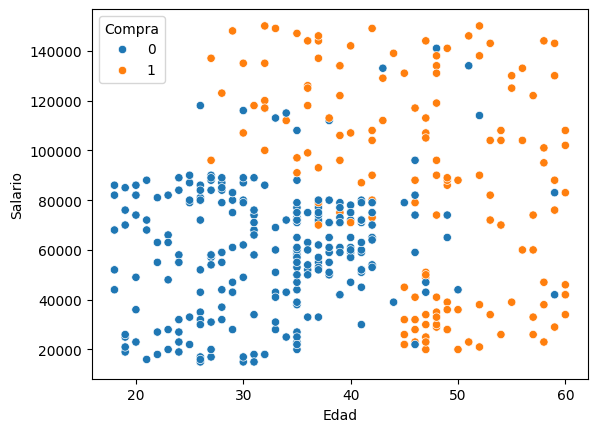

In [274]:
sns.scatterplot(x = 'Edad', y = 'Salario', hue = 'Compra', data =data)

plt.show();

### Definimos de la función logística $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

### Cálculo de la Función de Coste  $J(\theta)$ y el Gradiente

En la regresión Logística debemos minimizar la función de coste

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

Siendo el gradiente de esta función de coste:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

Podemos observar que la expresión es de la misma forma que la utilizada eb la regresión lineal, que en forma vectorial se puede escribir de la forma:

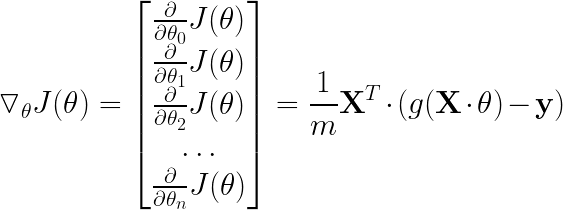

In [275]:
def logistic_function(x):
    return 1/ (1 + np.exp(-x))

In [276]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -(1 / m) * sum(error)
    return cost

In [277]:
def compute_grad(theta, x, y):
  m = len(y)
  y_pred = logistic_function(np.dot(x , theta))
  grad = 1 / m *(np.dot(x.transpose(), (y_pred - y)))
  return grad

### Formamos matriz XX,vector y  theta_inicial

In [278]:
scores = data[['Edad', 'Salario']].values
results = data['Compra'].values

In [279]:
#mean_scores = np.mean(scores, axis=0)
#std_scores = np.std(scores, axis=0)
#scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]



In [280]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scores
X_scaled = scaler.fit_transform(X)


In [281]:
X_scaled = np.append(np.ones((rows, 1)), X_scaled, axis=1) #include intercept
y = results.reshape(rows, 1)
theta_init = np.zeros((cols + 1, 1))

In [282]:
X_scaled.shape,y.shape,theta_init.shape

((400, 3), (400, 1), (3, 1))

In [283]:
cost = compute_cost(theta_init, X_scaled, y)
gradient = compute_grad(theta_init, X_scaled, y)
print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization [0.69314718]
Gradient at initialization: [[ 0.1425    ]
 [-0.29831974]
 [-0.17353327]]


### Gradiente Descendente

Minimizamos la función de coste $J(\theta)$  actualizando la siguiente ecuación (algoritmo del gradiente descendente) repitiendo hasta convergencia :  
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$    
 (actualizar simultaneamente $\theta_j$ para todo $j$)

In [284]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []

    for i in range(iterations):
        cost= compute_cost(theta, x, y)
        gradient = compute_grad(theta, x, y)
        theta = theta - (alpha * gradient)
        if i % 10000 == 0:
            print("Iteration", i, "Cost:", cost)
        costs.append(cost)
    return theta, costs

In [285]:
theta_init

array([[0.],
       [0.],
       [0.]])

In [286]:
theta, costs = gradient_descent(X_scaled, y, theta_init, 0.01, 200000)

Iteration 0 Cost: [0.69314718]
Iteration 10000 Cost: [0.3463964]
Iteration 20000 Cost: [0.3463146]
Iteration 30000 Cost: [0.34631423]
Iteration 40000 Cost: [0.34631423]
Iteration 50000 Cost: [0.34631423]
Iteration 60000 Cost: [0.34631423]
Iteration 70000 Cost: [0.34631423]
Iteration 80000 Cost: [0.34631423]
Iteration 90000 Cost: [0.34631423]
Iteration 100000 Cost: [0.34631423]
Iteration 110000 Cost: [0.34631423]
Iteration 120000 Cost: [0.34631423]
Iteration 130000 Cost: [0.34631423]
Iteration 140000 Cost: [0.34631423]
Iteration 150000 Cost: [0.34631423]
Iteration 160000 Cost: [0.34631423]
Iteration 170000 Cost: [0.34631423]
Iteration 180000 Cost: [0.34631423]
Iteration 190000 Cost: [0.34631423]


In [287]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[-1.13812197]
 [ 2.44457954]
 [ 1.22258176]]
Resulting cost: [0.34631423]


###  Convergencia de $J(\theta)$

Dibujamos $J(\theta)$ en relación al número de iteraciones del  gradiente descente:

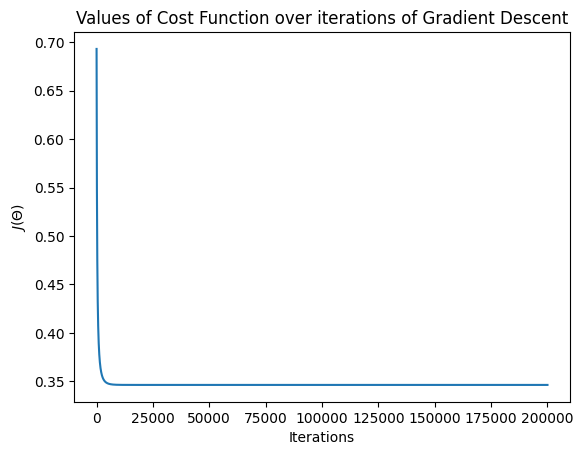

In [288]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Dibujemos la recta de decisión

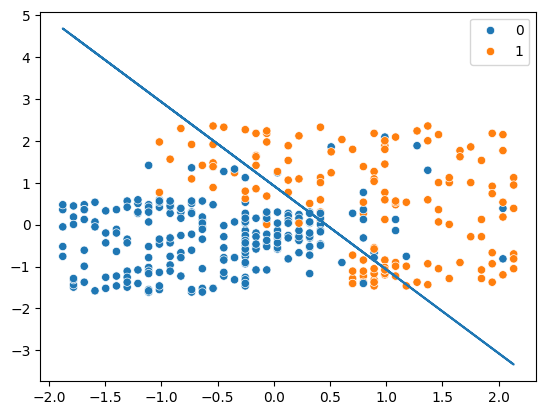

In [289]:
sns.scatterplot(x = X_scaled[0:,1], y = X_scaled[0:,2], hue = results)
decision_boundary = -(theta[0] + (theta[1])*X_scaled[0:,1])/(theta[2])
plt.plot(X_scaled[0:400,1], decision_boundary)


### Predicciones utilizando los valores $\theta$ encontrados

In [290]:
nueva_persona = np.array([[50, 35000]])
nueva_persona_scaled= scaler.transform(nueva_persona)

In [291]:
nuevo_dato=np.append(1,nueva_persona_scaled)
nuevo_dato

array([ 1.        ,  1.17910958, -1.02020853])

In [292]:
probability = logistic_function(nuevo_dato.dot(theta))
print(" Una persona de 50 años  y  35000 de salario tiene",
      np.round(probability[0], 2),"probabilidad de compra.")

 Una persona de 50 años  y  35000 de salario tiene 0.62 probabilidad de compra.


In [293]:
def predict(X, params):
    return np.round(logistic_function(X @ params))

Precisión 0.845
[[236  21]
 [ 41 102]]


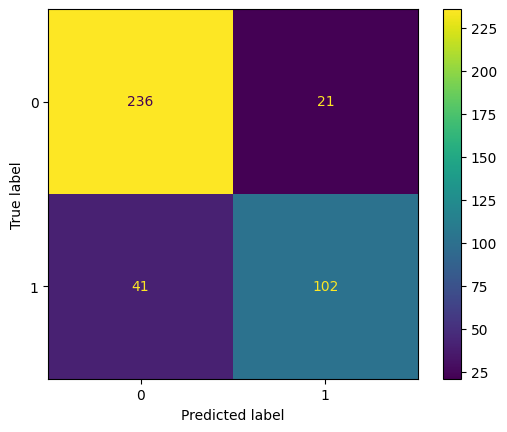

In [294]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

actual = y
predicted = predict(X_scaled, theta)
print("Precisión",accuracy_score(actual, predicted))
confusion_matrix = metrics.confusion_matrix(actual, predicted)
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()